In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

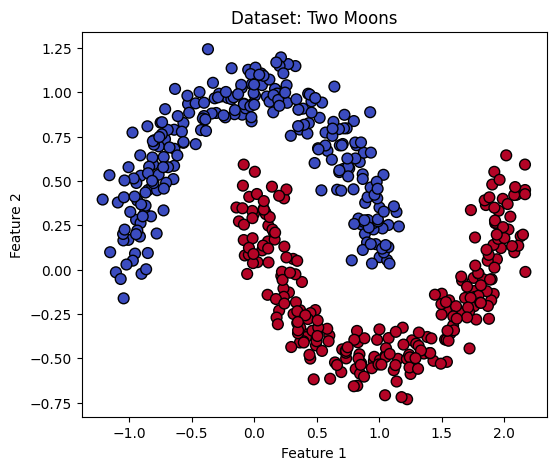

In [33]:
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=60, edgecolors='k')
plt.title("Dataset: Two Moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [34]:
def train_and_track_gradients(activation='sigmoid', layers=10, epochs=100):
    model = Sequential()
    model.add(Dense(10, activation=activation, input_dim=2))
    for _ in range(layers - 1):
        model.add(Dense(10, activation=activation))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    old_weights = model.get_weights()[0]

    history = model.fit(X_train, y_train, epochs=epochs, verbose=0)

    new_weights = model.get_weights()[0]

    gradient = (old_weights - new_weights) / 0.001
    avg_grad = np.mean(np.abs(gradient))

    return avg_grad, history.history['loss'], model


In [36]:
sigmoid_grad, sigmoid_loss, sigmoid_model = train_and_track_gradients('sigmoid', layers=10)
relu_grad, relu_loss, relu_model = train_and_track_gradients('relu', layers=10)


In [37]:
print("=== Average Gradient Magnitude ===")
print(f"Sigmoid: {sigmoid_grad:.6f}")
print(f"ReLU   : {relu_grad:.6f}")

=== Average Gradient Magnitude ===
Sigmoid: 154.170380
ReLU   : 93.336723


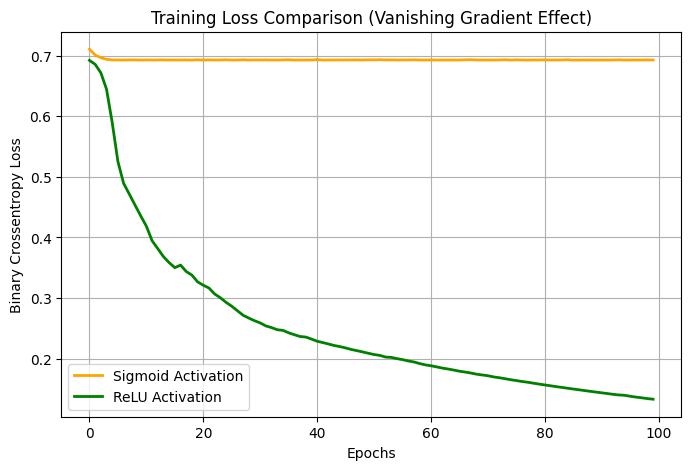

In [38]:
plt.figure(figsize=(8,5))
plt.plot(sigmoid_loss, label='Sigmoid Activation', linewidth=2, color='orange')
plt.plot(relu_loss, label='ReLU Activation', linewidth=2, color='green')
plt.title("Training Loss Comparison (Vanishing Gradient Effect)")
plt.xlabel("Epochs")
plt.ylabel("Binary Crossentropy Loss")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(6,5))
plt.bar(['Sigmoid', 'ReLU'], [sigmoid_grad, relu_grad],
        color=['orange', 'green'], edgecolor='k')
plt.title("Average Gradient Magnitude After Training")
plt.ylabel("Average |Gradient|")
plt.show()

In [ ]:
x_sample = tf.constant(X_train[:100], dtype=tf.float32)

sigmoid_output = sigmoid_model(x_sample).numpy()
relu_output = relu_model(x_sample).numpy()

plt.figure(figsize=(8,4))
plt.hist(sigmoid_output, bins=20, alpha=0.7, label='Sigmoid Output', color='orange')
plt.hist(relu_output, bins=20, alpha=0.7, label='ReLU Output', color='green')
plt.title("Activation Output Distribution (Vanishing Effect)")
plt.xlabel("Activation Output Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8,4))
bars = plt.barh(['Sigmoid', 'ReLU'], [sigmoid_grad, relu_grad], color=['#FFA726', '#66BB6A'])
plt.title("Vanishing Gradient Comparison Summary")
plt.xlabel("Average Gradient Magnitude")
for bar in bars:
    plt.text(bar.get_width() + 0.0005, bar.get_y() + 0.2,
             f"{bar.get_width():.6f}", color='black', fontsize=10)
plt.show()

In [1]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import tensorflow as tf


X, y = make_moons(n_samples=500, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_exploding(layers=50, epochs=100, lr=1.0, init_std=3.0):
    model = Sequential()
    initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=init_std)

    model.add(Dense(64, activation='relu', input_dim=2, kernel_initializer=initializer))
    for _ in range(layers - 1):
        model.add(Dense(64, activation='relu', kernel_initializer=initializer))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(learning_rate=lr),
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=epochs, verbose=0)
    return history.history['loss']



In [2]:

stable_loss = train_exploding(layers=10, epochs=100, lr=0.01, init_std=0.05)




/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Exploding setup



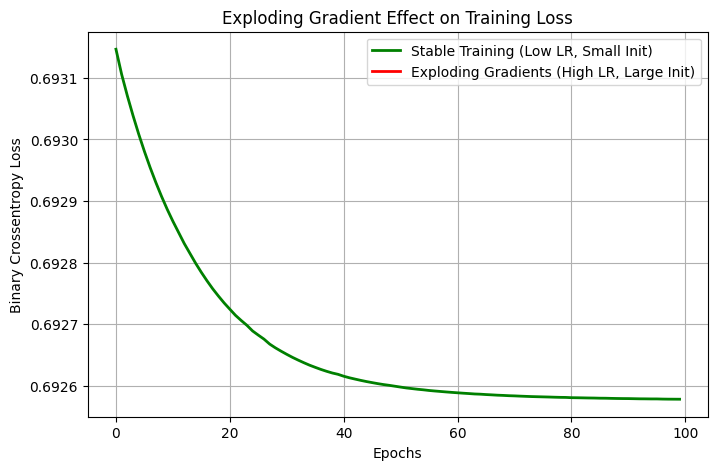

In [4]:

plt.figure(figsize=(8,5))
plt.plot(stable_loss, label='Stable Training (Low LR, Small Init)', linewidth=2, color='green')
plt.plot(exploding_loss, label='Exploding Gradients (High LR, Large Init)', linewidth=2, color='red')
plt.title("Exploding Gradient Effect on Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Binary Crossentropy Loss")
plt.legend()
plt.grid(True)
plt.show()